In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [80]:

Us = np.linspace(0.001,6, 15)


sc_dic = {'U':[], 'mu':[], 'nu':[], 'sq_det_SFW':[], 'SFWxx':[], 'SFWxy':[], 'delta':[], 'ns':[], 'deltaError':[], 'nError':[]}

for Uv in Us:
    ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5], nu=3, U=[Uv,Uv], mu=[-0.5,-0.5])
    dels, nus, mus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=10, Nmax=1200)
    
    print('sc ', Uv)
    nu_test = np.sum(ham.striped_props()[2])

    sfws, sdsfw = ham.detSFW(40)

    sc_dic['sq_det_SFW'].append(sdsfw)
    sc_dic['SFWxx'].append(sfws[0])
    sc_dic['SFWxy'].append(sfws[1])

    sc_dic['U'].append(Uv)
    sc_dic['mu'].append(ham.mu[0])
    sc_dic['nu'].append(nu_test)
    sc_dic['delta'].append([dels[0,-1],dels[1,-1]])
    sc_dic['ns'].append([nus[0,-1],nus[1,-1]])
    sc_dic['deltaError'].append(np.sum(np.std(np.abs(dels[:,-3:]), axis=1)))
    sc_dic['nError'].append(np.sum(np.std(np.abs(nus[:,-3:]), axis=1)))
    
    print('U, nu, sfw', Uv, nu_test, sfws)

sc_df = pd.DataFrame.from_dict(sc_dic)




sc  0.001
U, nu, sfw 0.001 (2.998250462479551-1.2770783474693569e-20j) [[-8.34604065e+00+3.90245873e-19j -6.10622664e-18-1.23545523e-18j]
 [-6.10622664e-18-1.23545523e-18j -8.34604065e+00+1.08016510e-18j]]
sc  0.4295
U, nu, sfw 0.4295 (2.9980755174388207-8.938402564556858e-20j) [[-3.89682507e-01+4.49249598e-19j -2.66453526e-17-1.09641130e-18j]
 [-2.55351296e-17-1.09641130e-18j -3.89682507e-01+1.51424299e-18j]]
sc  0.858
U, nu, sfw 0.858 (2.9978171878811968-2.956755428390714e-20j) [[-4.53113378e-01-3.58813650e-18j  3.99680289e-17-2.12036694e-19j]
 [ 4.13558077e-17-2.12036694e-19j -4.53113378e-01+3.75860332e-18j]]
sc  1.2864999999999998
U, nu, sfw 1.2864999999999998 (2.9976254463623793-4.2120644709112415e-20j) [[-5.37619396e-01+1.33311461e-19j  2.24820162e-17-1.71304188e-19j]
 [ 2.35922393e-17-1.71304188e-19j -5.37619396e-01+7.49976541e-19j]]
sc  1.7149999999999999
U, nu, sfw 1.7149999999999999 (2.997269533896009-2.656532750449847e-21j) [[-6.09299389e-01-8.09989473e-19j -1.31838984e-17+5

In [81]:
sc_dic['SFWxx_new']=np.array(sc_dic['SFWxx'])[:,0]
sc_dic['SFWxy_new']=np.array(sc_dic['SFWxx'])[:,1]

In [82]:
sc_dic

{'U': [0.001,
  0.4295,
  0.858,
  1.2864999999999998,
  1.7149999999999999,
  2.1435,
  2.5719999999999996,
  3.0004999999999997,
  3.429,
  3.8575,
  4.2860000000000005,
  4.7145,
  5.143,
  5.5715,
  6.0],
 'mu': [(-0.0004998413717437144-1.7883152986734597e-24j),
  (-0.21467599371211615+1.827014311280258e-21j),
  (-0.4288339937222168+3.104947495563176e-21j),
  (-0.6429821021960389+5.830414483631945e-21j),
  (-0.8570933886243643-1.1014693139777215e-21j),
  (-1.071164777111417-4.299893314027255e-21j),
  (-1.2852350075252836-2.8494395460364676e-20j),
  (-1.4995482566612734+1.3378853680040386e-20j),
  (-1.7138730677486902+9.28347724553675e-21j),
  (-1.928212173139451+6.925397953548602e-20j),
  (-2.1425225413974607+6.422877777806518e-20j),
  (-2.356827410451497-9.455794075534617e-22j),
  (-2.571098805843766-1.792824203299293e-20j),
  (-2.7853306634260093+6.00186755523124e-20j),
  (-2.9995174419667556+1.2159704520218467e-19j)],
 'nu': [(2.998250462479551-1.2770783474693569e-20j),
  (2.998

In [83]:
SFWdf = pd.DataFrame.from_dict(sc_dic)

In [84]:
SFWdf

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.0010,-0.000500-0.000000j,2.998250-0.000000j,8.346041-0.000000j,"[(-8.346040646090062+3.902458731314726e-19j), ...",[(-6.106226635438361e-18-1.2354552285466667e-1...,[(0.00014852142469814212+4.245898188581434e-21...,"[(1.0024913268986988-1.3582572839341786e-26j),...",5.789839e-06,0.000093,-8.346041+0.000000j,-6.106227e-18-1.235455e- 18j
1,0.4295,-0.214676+0.000000j,2.998076-0.000000j,0.389683-0.000000j,[(-0.3896825065748765+4.4924959817713015e-19j)...,[(-2.55351295663786e-17-1.0964113035034882e-18...,[(0.020925916802191195-1.0685695198055897e-19j...,"[(1.00017069528518+2.4705925559432042e-21j), (...",1.761854e-07,0.000109,-0.389683+0.000000j,-2.664535e-17-1.096411e- 18j
2,0.8580,-0.428834+0.000000j,2.997817-0.000000j,0.453113-0.000000j,"[(-0.4531133779580345-3.588136503481741e-18j),...",[(4.135580766728708e-17-2.1203669442107846e-19...,[(0.044790695458479544-4.8399015897648093e-20j...,"[(1.000347221159172-1.3295068406479298e-20j), ...",2.696971e-07,0.000123,-0.453113-0.000000j,3.996803e-17-2.120367e- 19j
3,1.2865,-0.642982+0.000000j,2.997625-0.000000j,0.537619-0.000000j,[(-0.5376193956418776+1.3331146148205077e-19j)...,[(2.3592239273284576e-17-1.7130418843168398e-1...,"[(0.07332597916210379+6.411713159534447e-20j),...","[(1.0006093943157193+1.6189616891295637e-21j),...",2.125034e-06,0.000133,-0.537619+0.000000j,2.248202e-17-1.713042e- 19j
4,1.7150,-0.857093-0.000000j,2.997270-0.000000j,0.609299+0.000000j,"[(-0.609299389455496-8.099894730111668e-19j), ...",[(-1.845745778439323e-17+5.639081707691875e-19...,"[(0.10683159241352802+3.860424754569128e-20j),...","[(1.0010265049284723-2.8146752641454596e-20j),...",9.214013e-06,0.000147,-0.609299-0.000000j,-1.318390e-17+5.639082e- 19j
5,2.1435,-1.071165-0.000000j,2.996829-0.000000j,0.665084-0.000000j,[(-0.6650837900317371+2.5682575945682775e-19j)...,[(8.711347615486531e-17-6.252221977859102e-19j...,"[(0.14491058101542467-3.799604164848071e-20j),...","[(1.0016411103606662+2.9989442575877354e-20j),...",3.717455e-05,0.000162,-0.665084+0.000000j,9.488504e-17-6.252222e- 19j
6,2.5720,-1.285235-0.000000j,2.996527+0.000000j,0.702928-0.000000j,"[(-0.702927566842785-3.6048546782000324e-19j),...",[(-3.313321839115702e-17-7.923980569161818e-19...,[(0.18609113818637943-1.7346587350775065e-19j)...,"[(1.0023548065443397-4.7388477719491287e-20j),...",1.463267e-04,0.000166,-0.702928-0.000000j,-3.354955e-17-7.923981e- 19j
7,3.0005,-1.499548+0.000000j,2.997257+0.000000j,0.721666+0.000000j,[(-0.7216655003316831+3.8026791558987217e-19j)...,[(4.805184028455756e-18-9.329364009515078e-20j...,"[(0.2269526021437528+4.1613878526968026e-20j),...","[(1.0023631624185234+1.597444212770962e-20j), ...",1.380891e-04,0.000122,-0.721666+0.000000j,8.344020e-18-9.329364e- 20j
8,3.4290,-1.713873+0.000000j,2.997853-0.000000j,0.723026+0.000000j,[(-0.7230264766229455-4.1450084309118945e-19j)...,[(2.571988439283371e-17+3.603568607867695e-19j...,"[(0.2651579135734834+2.3089174011612457e-20j),...","[(1.0022633011303725-1.5609874080328266e-20j),...",1.363662e-04,0.000088,-0.723026-0.000000j,2.523416e-17+3.603569e- 19j
9,3.8575,-1.928212+0.000000j,2.998367-0.000000j,0.710958+0.000000j,"[(-0.7109583700561777-9.38539351887678e-19j), ...",[(-6.490467885367224e-17+1.5479665377952088e-1...,"[(0.2988981421978619+7.883934814633368e-20j), ...","[(1.0020259837870247-1.1805498955564952e-19j),...",1.248852e-04,0.000061,-0.710958-0.000000j,-6.691696e-17+1.547967e- 19j


In [85]:
SFWdf.to_csv('sfw_scmu_15U_0-6_nu_eq_3')

In [30]:
n=3
d = SFWdf.delta.iloc[n]
ns = SFWdf.ns.iloc[n]
Uv = SFWdf.U.iloc[n]
m = SFWdf.mu.iloc[n]
nu = SFWdf.nu.iloc[n]


In [31]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])


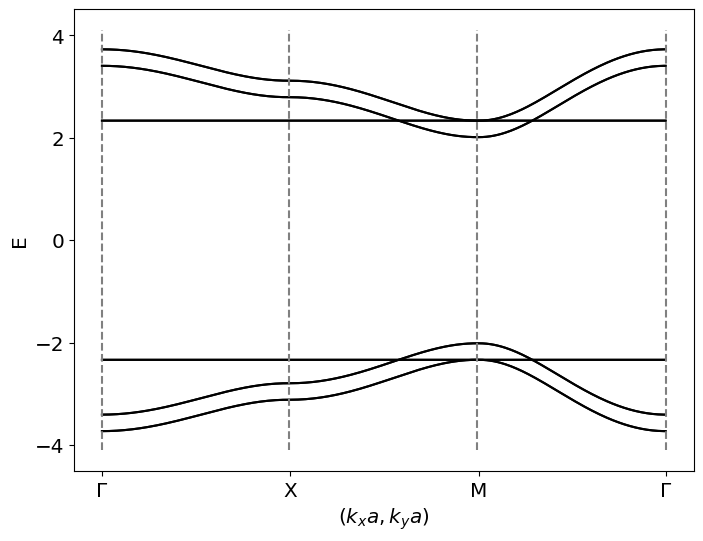

In [32]:
ham.plot_bands()

In [86]:
sfwtab_1 = pd.read_csv(r'sfw_scmu_10U_0-3_nu_eq_3', index_col=0)
sfwtab_1

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.001000,(-0.0004998413717437144-1.7883152986734597e-24j),(2.998250462479551-1.2770783474693569e-20j),(2.0869959256948913+5.0612203823638e-19j),[-2.08699594e+00-1.08034290e-18j 2.46342089e-...,[ 2.46342089e-04-1.37995872e-19j -2.08699594e+...,[(0.00014852142469814212+4.245898188581434e-21...,"[(1.0024913268986988-1.3582572839341786e-26j),...",5.789839e-06,0.000093,(-2.0869959402335976-1.080342899881003e-18j),(0.0002463420890672682-1.3799587175375357e-19j)
1,0.334222,(-0.1670536281258514+5.342896739276391e-21j),(2.998082472032473-2.4338357651418266e-19j),(0.20729625221987066+1.1996873502222309e-18j),[-0.21586395-1.44750492e-18j 0.06021219+8.309...,[ 0.06021219+8.30944876e-19j -0.21586395-1.320...,[(0.016209520399599345+1.6523066034928748e-19j...,"[(1.0001523962344394+3.9336683499313177e-22j),...",2.249872e-07,0.000109,(-0.21586394789646124-1.4475049179507481e-18j),(0.06021218993725808+8.309448761303099e-19j)
2,0.667444,(-0.33359952201047194+3.659494579639856e-21j),(2.997935720144892-1.3204024571697615e-19j),(0.27905440740894905+1.801224937368322e-19j),[-0.2943999 -1.44561331e-18j 0.09380799+7.993...,[ 0.09380799+7.99385342e-19j -0.2943999 +5.947...,"[(0.03362825606166449+9.120886015456396e-21j),...","[(1.0002550762878484-6.212278821501623e-21j), ...",1.247976e-07,0.000117,(-0.294399899355937-1.4456133143962643e-18j),(0.0938079871142421+7.993853420272534e-19j)
3,1.000667,(-0.500141372102053+1.1384925767701415e-20j),(2.9978279889286314-1.0616086033107087e-19j),(0.34872161136101437+1.0422249793258574e-18j),[-0.36670703+1.49112532e-19j 0.11343404+1.056...,[ 0.11343404+1.05626294e-18j -0.36670703-2.784...,[(0.053750531341223685-6.550616443576443e-20j)...,"[(1.0004105992614192-1.0725262946414952e-20j),...",5.808863e-07,0.000123,(-0.36670702804013205+1.4911253234749336e-19j),(0.11343404331954067+1.0562629431939354e-18j)
4,1.333889,(-0.666666205271484-4.4091591986218895e-21j),(2.997618664571199+5.675195694735282e-20j),(0.4107128088683177+1.757067651423552e-19j),[-0.4290532 -1.08146169e-18j 0.12410334+9.350...,[ 0.12410334+9.35065232e-19j -0.4290532 +2.041...,"[(0.07678573788529808-4.796497335242036e-21j),...","[(1.0006400306972558+4.846239492376816e-20j), ...",2.433881e-06,0.000133,(-0.42905320243487327-1.0814616898616877e-18j),(0.12410334061221759+9.350652317139577e-19j)
5,1.667111,(-0.8331593075491678-1.882871986632883e-20j),(2.9972655570874336+1.2953854106852917e-19j),(0.4655047288339459+1.503997766519397e-18j),[-0.48276494-1.70210799e-18j 0.12793487+9.767...,[ 0.12793487+9.76743854e-19j -0.48276494-1.716...,[(0.10284540264713424-6.3604915109840756e-21j)...,"[(1.000988528110796+2.2528567199640843e-20j), ...",8.443498e-06,0.000148,(-0.48276493561359135-1.7021079915447424e-18j),(0.12793486816041433+9.767438540961293e-19j)
6,2.000333,(-0.9996284552438277+1.9416044911919895e-20j),(2.996883396865896-9.347423760292702e-20j),(0.5127186424551564+1.6321654505186689e-18j),[-0.52801141-3.33498863e-18j 0.12615723+8.242...,[ 0.12615723+8.24281364e-19j -0.52801141-2.286...,"[(0.1317579054981698+4.451549361640573e-22j), ...","[(1.0014576068517942+1.706795958707076e-20j), ...",2.638842e-05,0.000163,(-0.5280114132007423-3.3349886331092585e-18j),(0.12615722789118275+8.242813639430251e-19j)
7,2.333556,(-1.1660934440671564-8.080506315936667e-21j),(2.9965843169901385+4.7864211467860814e-20j),(0.5512892893850049+2.983736889716054e-18j),[-0.56416793-3.77884695e-18j 0.11985648+8.921...,[ 0.11985648+8.92129551e-19j -0.56416793-2.431...,"[(0.1629409529138118-1.2675264339311441e-19j),...","[(1.0020048605541056+6.932566768009252e-22j), ...",7.642690e-05,0.000170,(-0.5641679330739313-3.77884695212444e-18j),(0.11985648133613394+8.921295509385545e-19j)
8,2.666778,(-1.3326341869699307+3.4002121119301665e-20j),(2.996691448888708-1.7021703115694834e-19j),(0.5800250873584806+2.8228993683400964e-18j),[-0.59041638-2.56512686e-18j 0.11028325+1.452...,[ 0.11028325+1.45246141e-19j -0.59041638

In [97]:
n=3
d =sfwtab_1.delta.iloc[n]
ns =sfwtab_1.ns.iloc[n]
mu = sfwtab_1.mu.iloc[n]
nu =sfwtab_1.nu.iloc[n]
Uv = sfwtab_1.U.iloc[n]


In [98]:
m= complex(mu)
nu = complex(nu)

In [99]:
ns=list(literal_eval(ns[1:-1]))
d=list(literal_eval(d[1:-1]))

In [100]:
d

[(0.053750531341223685-6.550616443576443e-20j),
 (0.27687465705030206+3.4400784572571072e-18j)]

In [106]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])
ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5],nu=3, U=[1,1], mu=[0.1,0.1])


In [107]:
nu

(2.9978279889286314-1.0616086033107087e-19j)

In [108]:
ham.Deltra(50,HF=True, alpha=0.7, Nmin=10, Nmax=1300)

(array([[1.        +0.00000000e+00j, 0.77472966-5.33944281e-20j,
         0.6048314 +3.56750231e-20j, 0.47611711-1.72665808e-19j,
         0.37810968-8.22258596e-20j, 0.30316893-7.81050759e-20j,
         0.24568614-4.90302465e-20j, 0.20149673+5.43479893e-20j,
         0.16747553+5.63404398e-20j, 0.14125731+7.48380872e-20j,
         0.12104056+3.97584402e-20j, 0.10544668+3.07535881e-20j,
         0.09341724+1.48869765e-20j, 0.08413774+2.36095166e-20j,
         0.07698039+8.41565823e-21j, 0.0714609 -4.31002782e-20j,
         0.06720541+1.27862769e-20j, 0.06392526-3.81226487e-20j,
         0.06139756-5.79334353e-20j, 0.0594502 -9.63404371e-20j,
         0.05795031-3.96864266e-20j, 0.05679536-5.36964375e-20j,
         0.05590622-1.69696972e-20j, 0.05522187-5.10867068e-20j,
         0.05469525-4.11175291e-20j, 0.05429008-3.00205716e-20j,
         0.05397841-8.32156953e-21j, 0.0537387 -2.31905100e-20j,
         0.05355437-3.10539402e-20j, 0.05341264-2.86373394e-20j,
         0.05330369-5.209

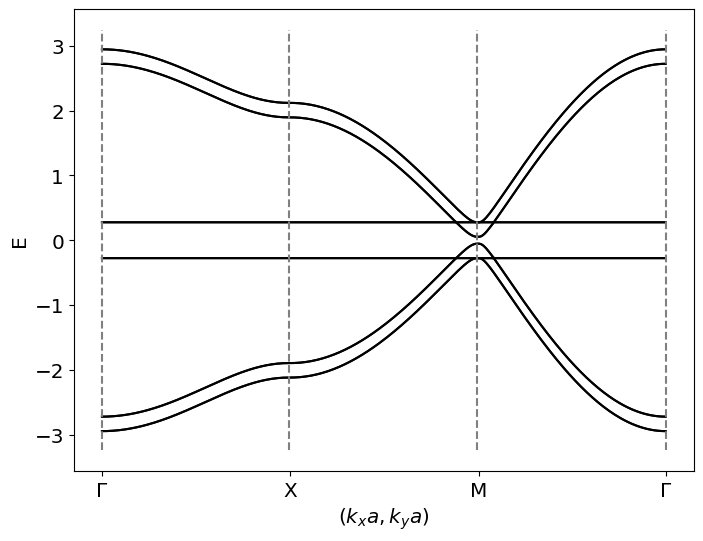

In [109]:
ham.plot_bands()

In [110]:
sdsfwlist = []
for it in range (60,100,10):
    sfws, sdsfw = ham.detSFW(it)
    sdsfwlist.append(sdsfw)
    print(sfws)


[[-4.45369376e-01-1.57643439e-18j -3.79200914e-17+2.36823526e-19j]
 [-3.60697197e-17+2.36823526e-19j -4.45369376e-01+6.57351079e-19j]]


KeyboardInterrupt: 

In [67]:
sdsfwlist

[(0.39711827559663554+2.4220413511566768e-18j),
 (0.3638422493748509-2.3613696123165877e-18j),
 (0.34872161136101437+1.0422249793258574e-18j),
 (0.33997162722756824+9.921755781194246e-19j),
 (0.33426235773986934-2.4785384360116367e-18j),
 (0.33024491450517185-4.791413846997925e-19j),
 (0.3272651774664694-5.449448650420194e-19j),
 (0.32496747538268994-2.6781712188633753e-20j)]

In [74]:
sfws

array([[6.45476684e-01+4.57388841e-19j, 5.35595873e-18-1.54128749e-19j],
       [6.88251539e-18-1.54128749e-19j, 6.45476684e-01+5.95792996e-19j]])

In [ ]:
np.sqrt(np.linalg.det(ten))